In [42]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [43]:
X = np.load('../Classification/text_data.npy')
y = np.load('../Classification/labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

In [44]:
df = pd.DataFrame(X_train)
df = df - df.mean()
covariance_matrix = df.cov()
correlation_matrix = df.corr()

<Axes: >

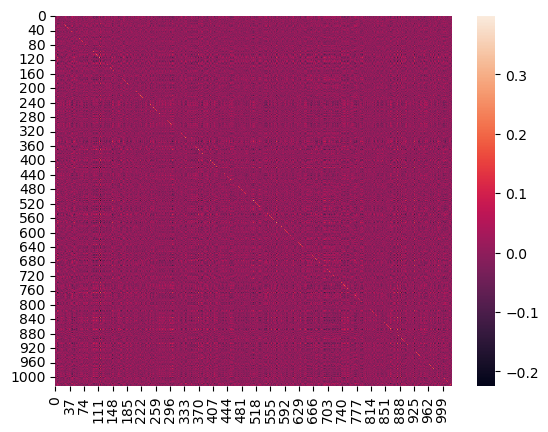

In [45]:
sns.heatmap(covariance_matrix)

<Axes: >

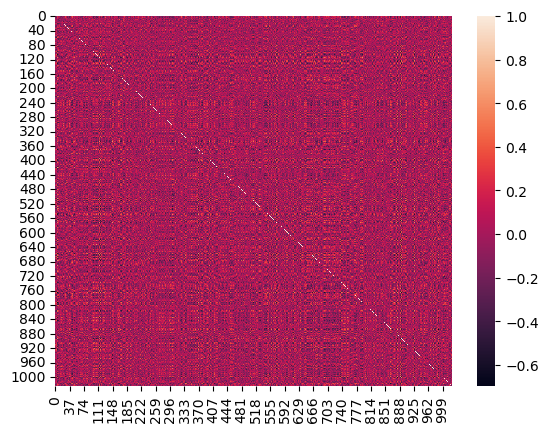

In [46]:
sns.heatmap(correlation_matrix)

In [47]:
eig_val, eig_vec = np.linalg.eig(covariance_matrix)
permute = eig_val.argsort()
eig_val = eig_val[permute]
eig_vec = eig_vec[:, permute]

In [ ]:
print("Eigenvalues of Covariance matrix")
print(len(eig_val))
print(eig_val[979:])        # 45 components over 0.5

Eigenvalues of Covariance matrix
1024
[ 0.50417505  0.51073275  0.52119456  0.53083933  0.53936128  0.56127914
  0.56950128  0.57306416  0.5812512   0.5865261   0.60382302  0.6141847
  0.6392715   0.64666506  0.65076207  0.67419898  0.69271425  0.71521289
  0.74088179  0.77138519  0.77432252  0.79944121  0.85189534  0.8689897
  0.87906576  0.93887855  1.03289979  1.08056098  1.16564929  1.18685945
  1.20692291  1.23049005  1.44043109  1.52437205  1.69784983  1.77842294
  2.00601955  2.20012159  2.26728753  2.39950412  2.73934303  6.11941519
  6.78974314 12.54891838 18.01763059]


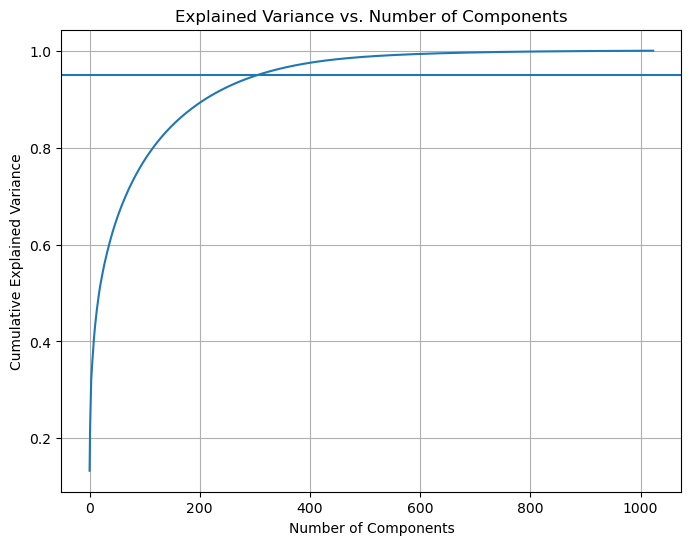

In [55]:
pca = PCA(n_components=None)
pca.fit(X_train)  # Fit PCA on the training data features

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(0.95)
plt.grid(True)
plt.show()


From 306 components and up, 95% or more of the variance is explained

In [57]:
np.where(np.cumsum(pca.explained_variance_) > 50)

(array([   6,    7,    8, ..., 1021, 1022, 1023], dtype=int64),)